In [1]:
import numpy as np
import matplotlib.pyplot as plt


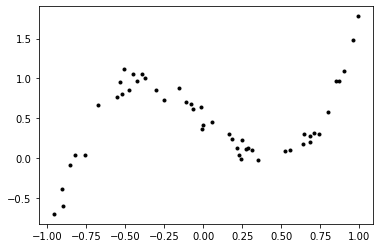

In [2]:
# Polynomial interpolation

def p(t):
    return 3*(t + 0.2)**3 - 2*(t + 0.5)**2 + 1

N = 50
sig = 0.1

x = np.sort(np.random.rand(N)*2 - 1)
y = p(x) + sig * np.random.randn(N)

plt.plot(x, y, 'k.')

/Users/khoras0000/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


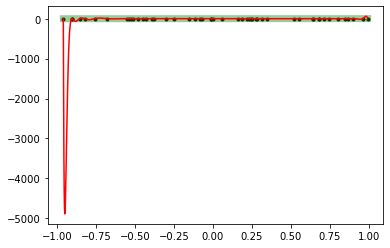

In [3]:
K = 40
x_grid = np.linspace(x.min(), x.max(), 1000)
# x_grid = np.linspace(-1, 1, 1000)

coeff = np.polyfit(x, y, K)
y_hat = np.poly1d(coeff)(x_grid)

plt.plot(x, y, 'k.')
plt.plot(x_grid, p(x_grid), 'g', linewidth=7, alpha=0.4)
plt.plot(x_grid, y_hat, 'r')


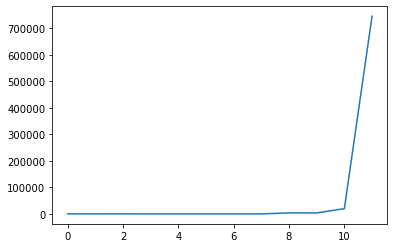

In [4]:
# the polynomial degree K is a hyperparameter!

alpha = 0.75
K_max = 12


mse = np.zeros((K_max))
for i_fold in range(1000):

    idx_train = np.random.randint(0, N, int(N*alpha))
    idx_test = np.setdiff1d(np.arange(N), idx_train)

    x_train, y_train = x[idx_train], y[idx_train]
    x_test, y_test = x[idx_test], y[idx_test]

    # das ist verboten!
    for K in range(K_max):
        coeff = np.polyfit(x_train, y_train, K)
        y_hat_test = np.poly1d(coeff)(x_test)
        mse[K] += np.sum((y_hat_test - p(x_test))**2)
    
plt.plot(np.arange(K_max), mse / 20)

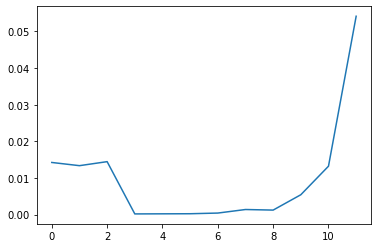

In [5]:
# crossvalidation


alpha = 0.75
K_max = 12
n_folds = 20

idx_train = np.random.randint(0, N, int(N*alpha))
idx_test = np.setdiff1d(np.arange(N), idx_train)

x_train, y_train = x[idx_train], y[idx_train]
x_test, y_test = x[idx_test], y[idx_test]


beta = 1/alpha * (1 - alpha)

mse_hat = np.zeros((K_max))
for i_fold in range(n_folds):

    idx_train_cv = np.random.randint(0, N, int(N*alpha))
    idx_validate = np.setdiff1d(np.arange(N), idx_train)

    x_train_cv, y_train_cv = x[idx_train_cv], y[idx_train_cv]
    x_validate, y_validate = x[idx_validate], y[idx_validate]

    for K in range(K_max):
        coeff = np.polyfit(x_train_cv, y_train_cv, K)
        y_hat_validate = np.poly1d(coeff)(x_validate)
        mse_hat[K] += np.mean((y_hat_validate - p(x_validate))**2)
        
mse_hat /= n_folds
plt.plot(np.arange(K_max), mse_hat / 20)

In [6]:
# pick the best K

K_best = np.argmin(mse_hat)
print("The best K is", K_best)

# use this to compute the test error

coeff = np.polyfit(x_train, y_train, K_best)
y_hat_test = np.poly1d(coeff)(x_test)
mse_best = np.mean((y_hat_test - p(x_test))**2)

print("The cross-validation MSE estimate is:", mse_hat[K_best])
print("The test MSE is:", mse_best)

# This is really bootstrappy, of course

The best K is 3
The cross-validation MSE estimate is: 0.003261797826350215
The test MSE is: 0.0017435283514662836


In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

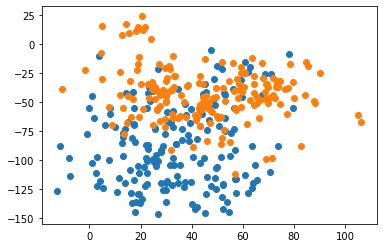

In [8]:
v1 = np.random.randn(64, 1)
v2 = np.random.randn(64, 1)


f1 = digits.data @ v1
f2 = digits.data @ v2

twos = digits.target == 2
sevens = digits.target == 7


plt.scatter(f1[twos], f2[twos])
plt.scatter(f1[sevens], f2[sevens])

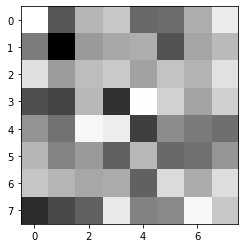

In [14]:
plt.imshow(v2.reshape((8, 8)), cmap=plt.cm.gray_r)

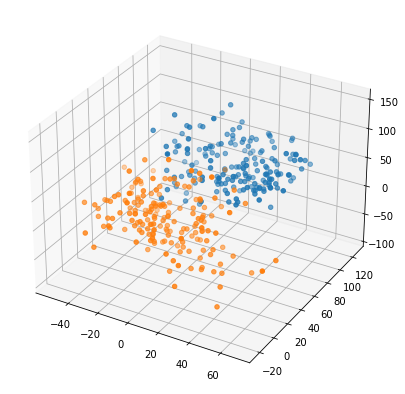

In [18]:
from mpl_toolkits import mplot3d


v1 = np.random.randn(64, 1)
v2 = np.random.randn(64, 1)
v3 = np.random.randn(64, 1)

f1 = digits.data @ v1
f2 = digits.data @ v2
f3 = digits.data @ v3

twos = digits.target == 2
sevens = digits.target == 7

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(f1[twos], f2[twos], f3[twos])
ax.scatter3D(f1[sevens], f2[sevens], f3[sevens])

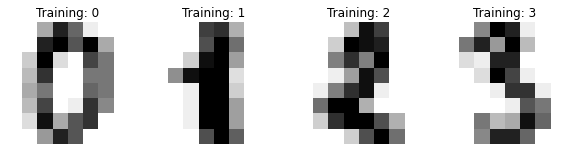

In [10]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [21]:
# flatten the images

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

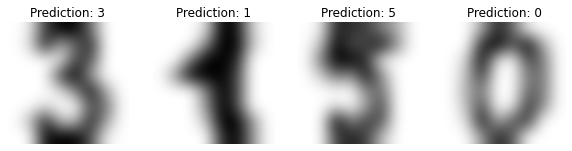

In [23]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="bicubic")
    ax.set_title(f"Prediction: {prediction}")